In [40]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

In [41]:
url='https://raw.githubusercontent.com/fulekset/voila-dashboard/07f95403e7b21fbbdfd16824f7473034f9fdcf09/TESLA.xlsx'
df_prg=pd.read_excel(url, engine="openpyxl")

In [42]:
# data=pd.read_excel(r"C:\Users\fulekset\Desktop\TESLA.xlsx")
# df_prg=data

In [43]:
# df_prg.dtypes

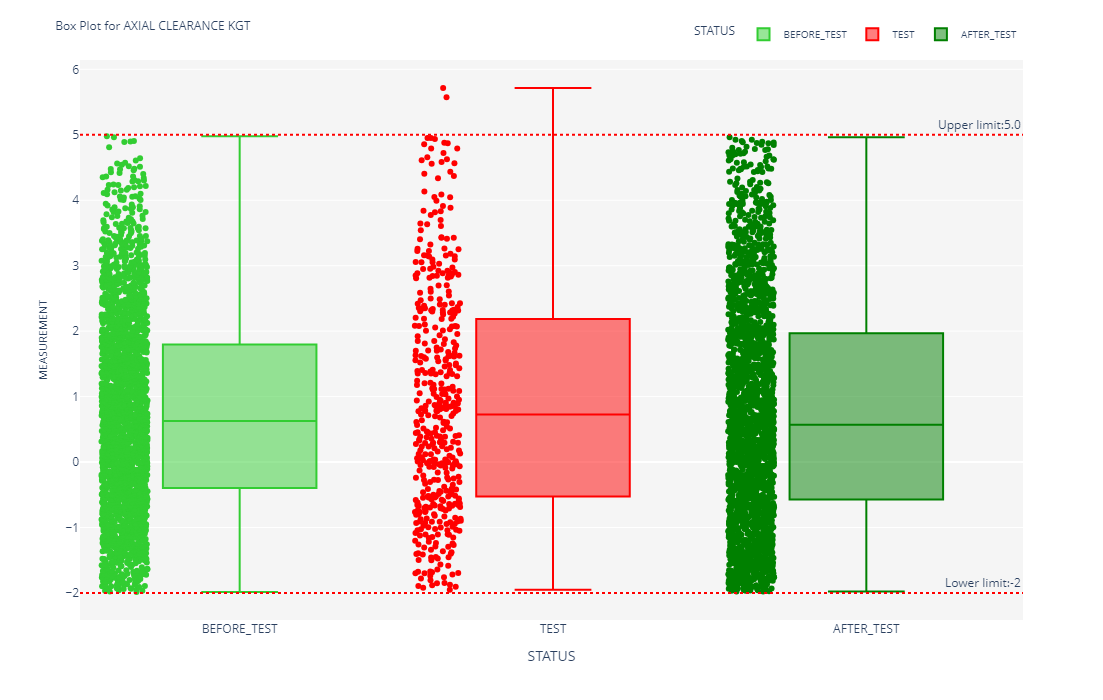

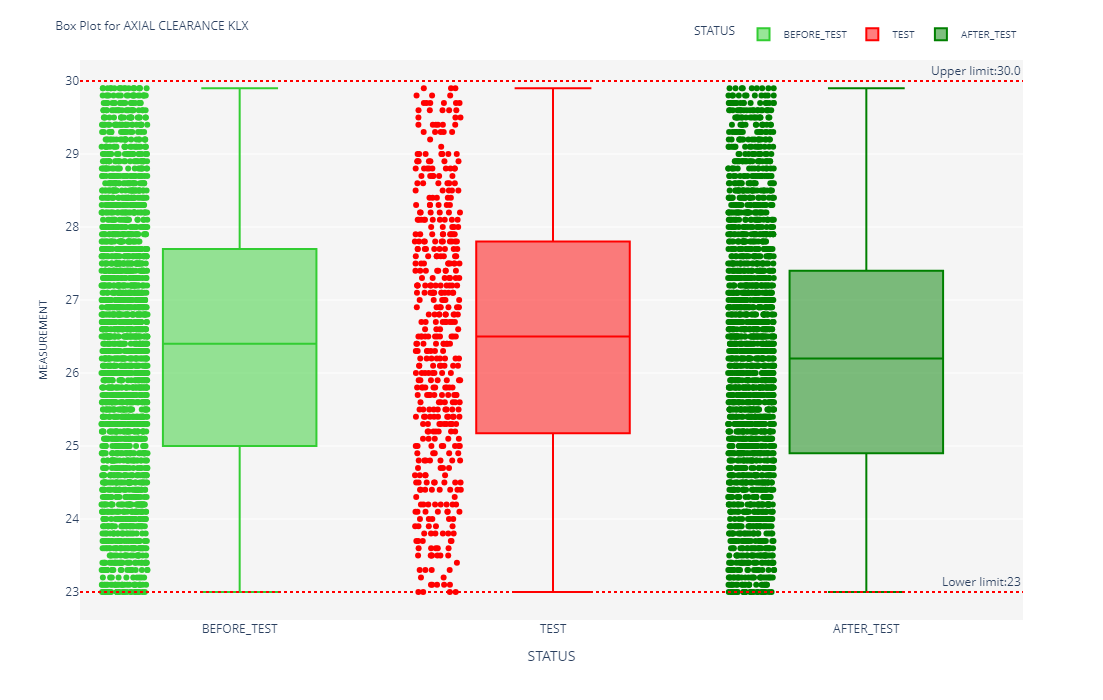

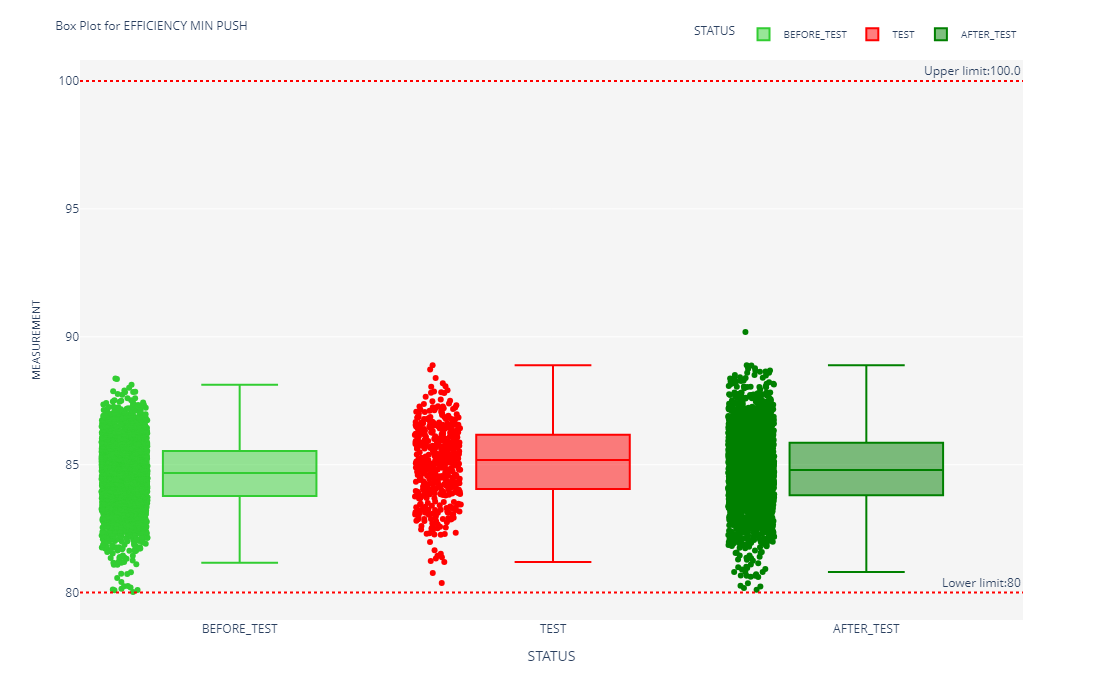

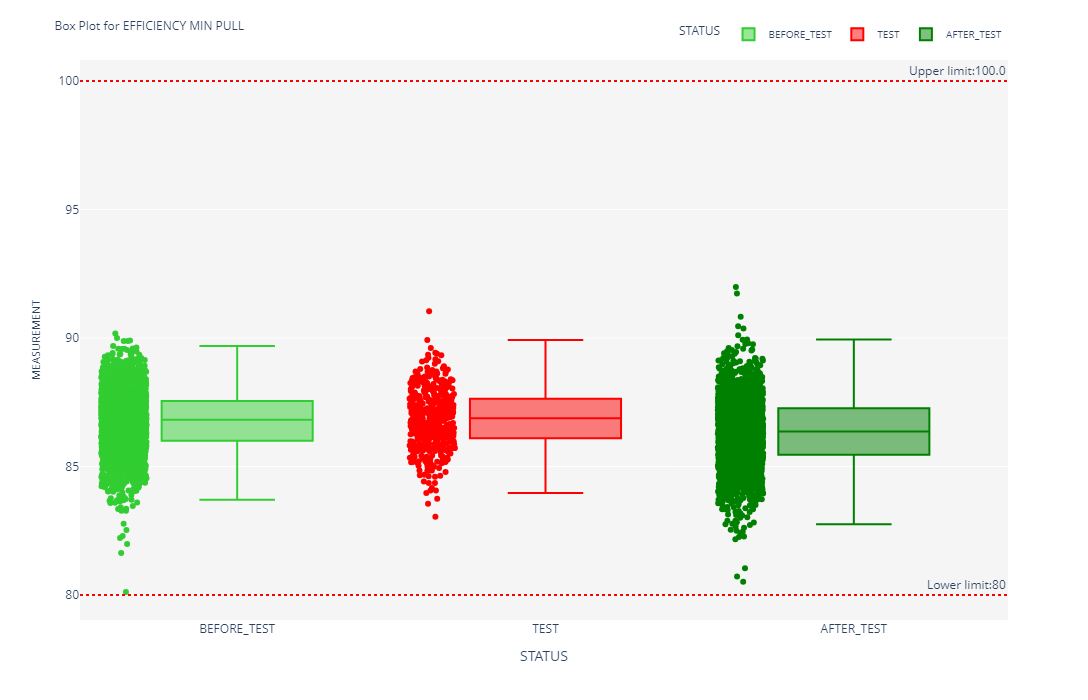

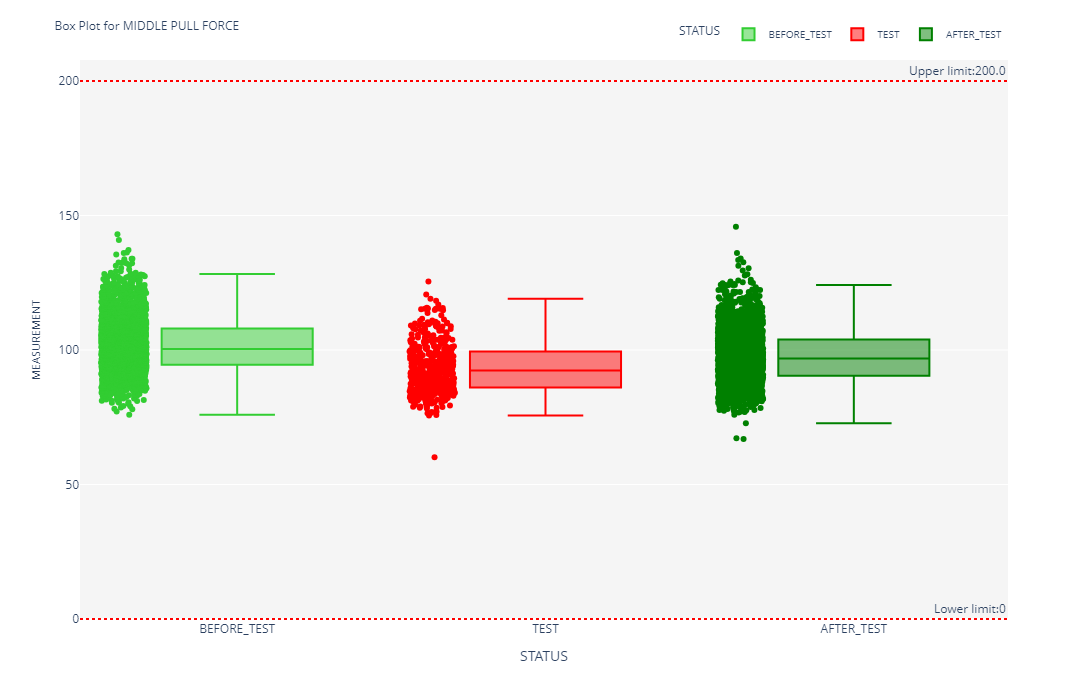

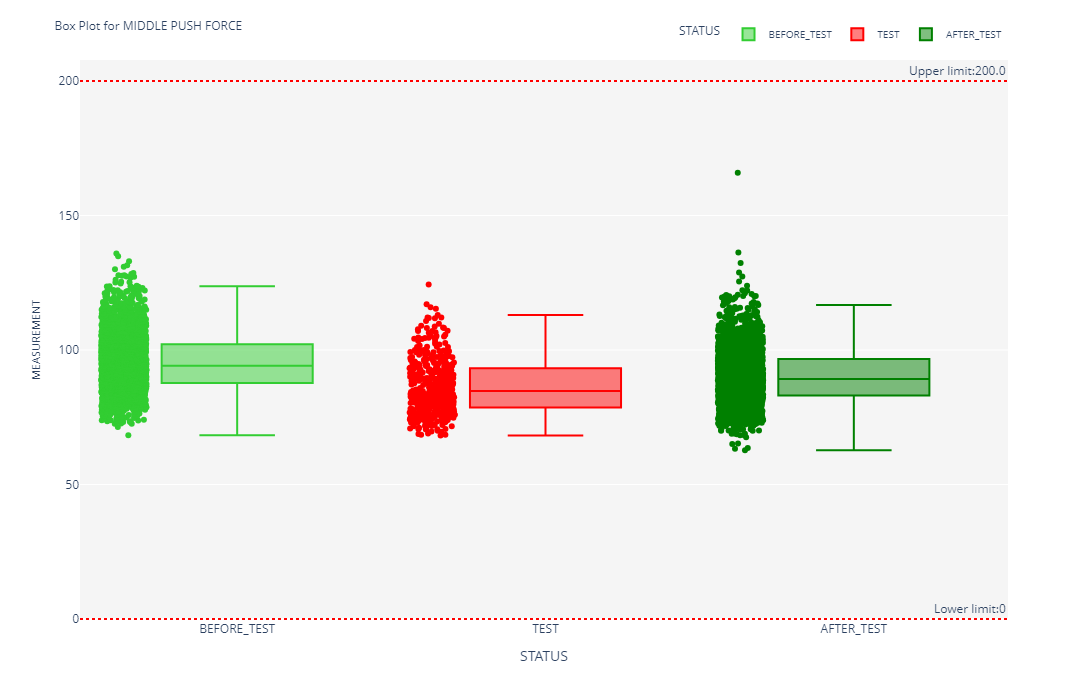

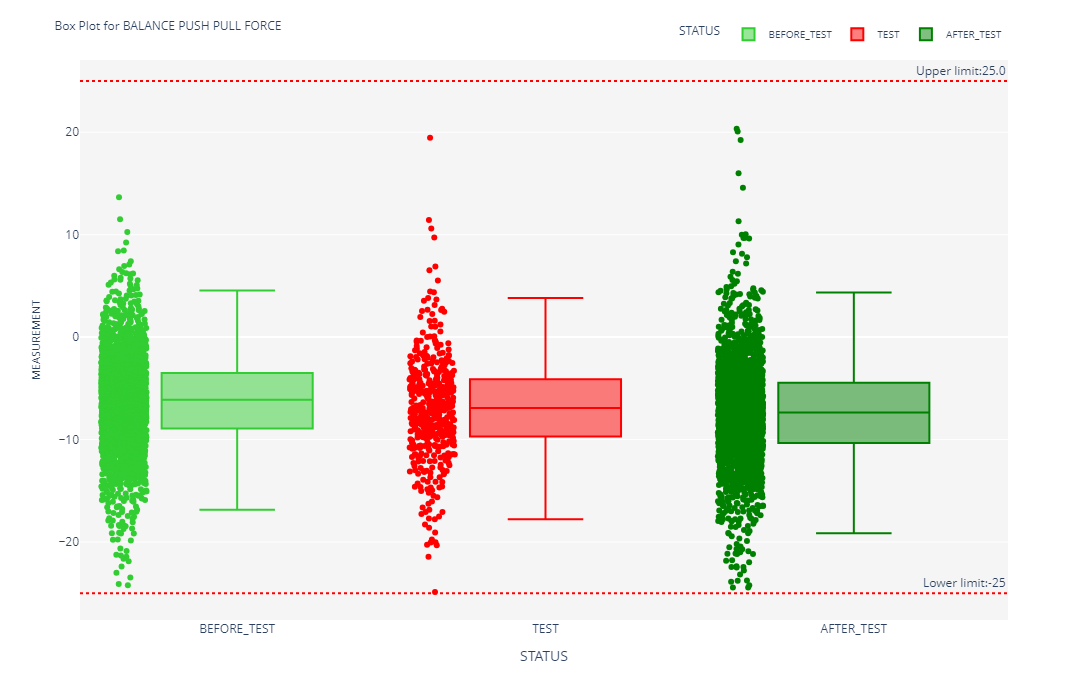

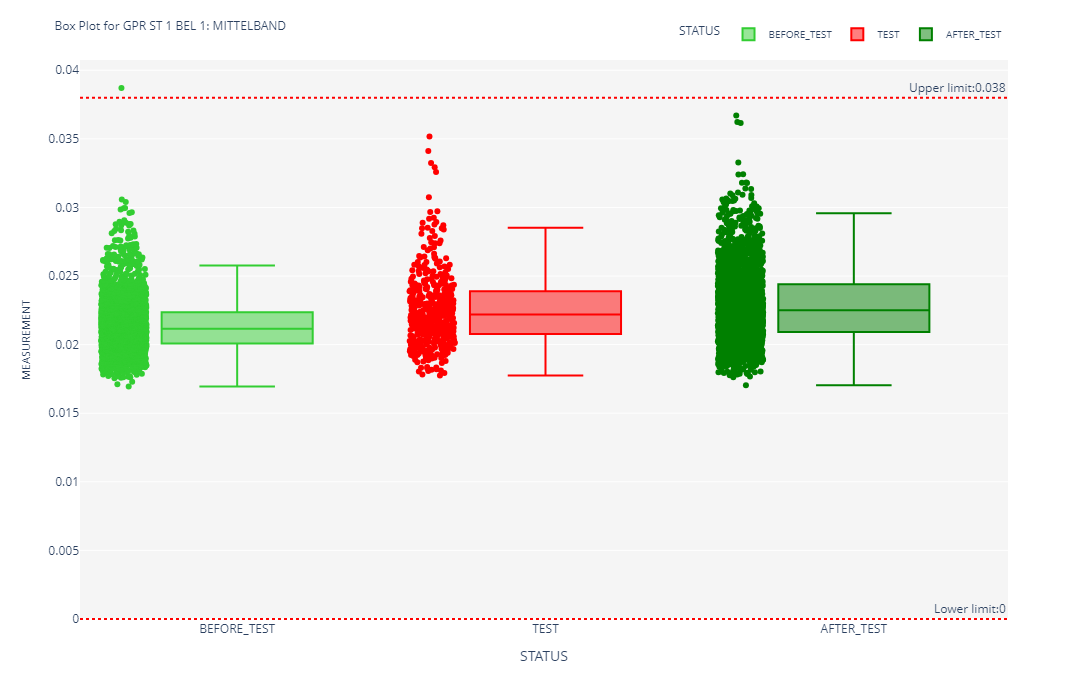

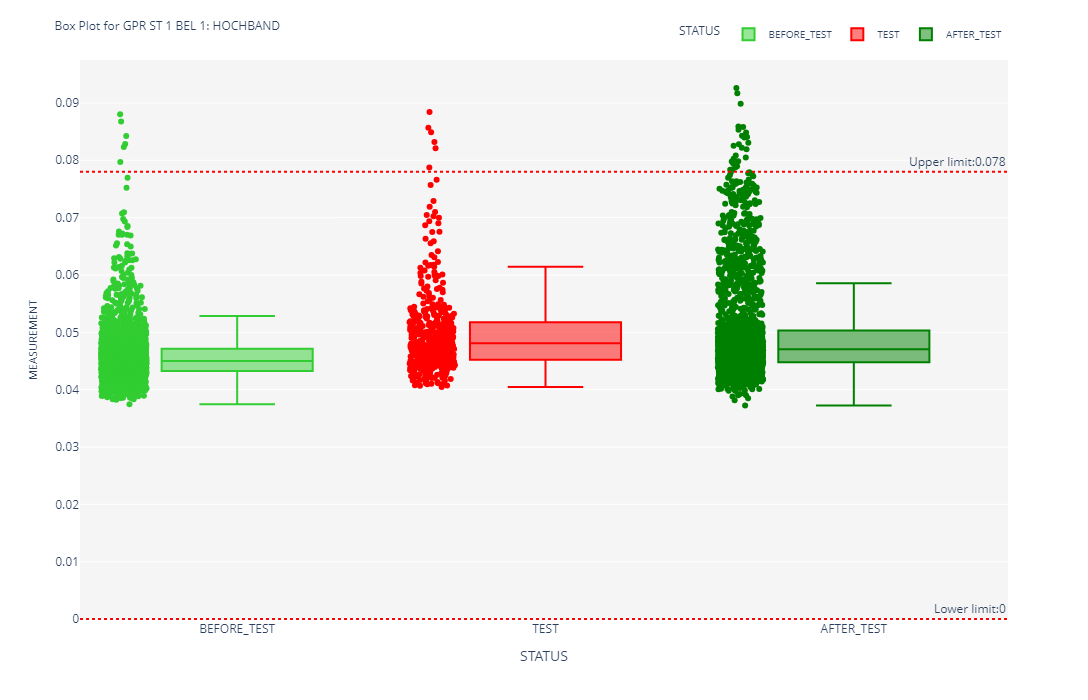

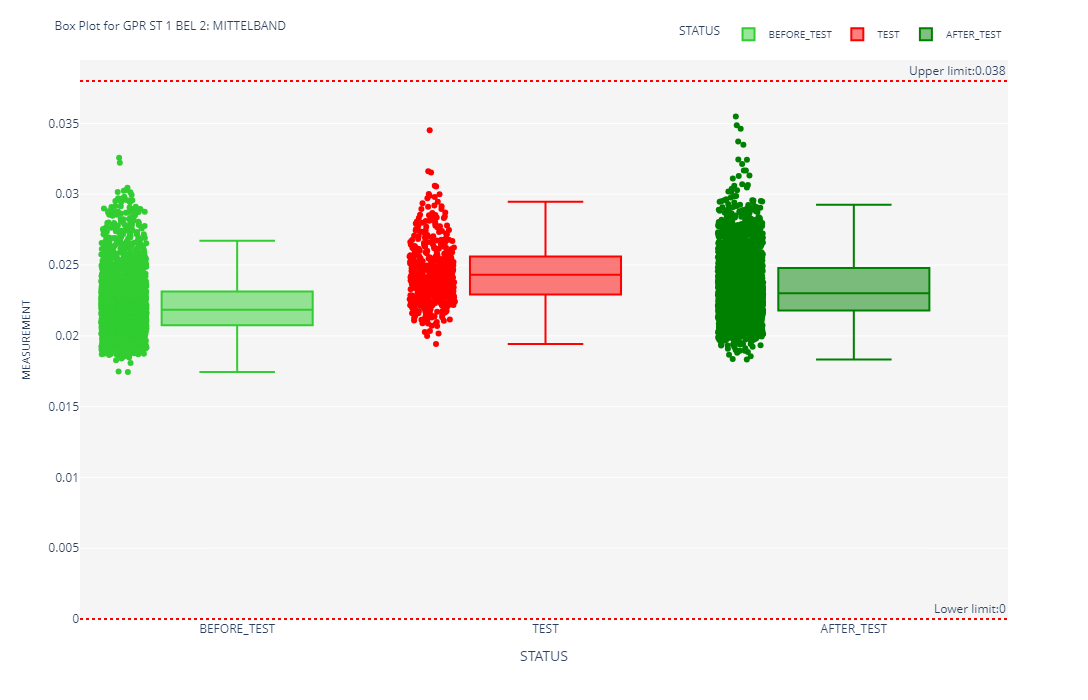

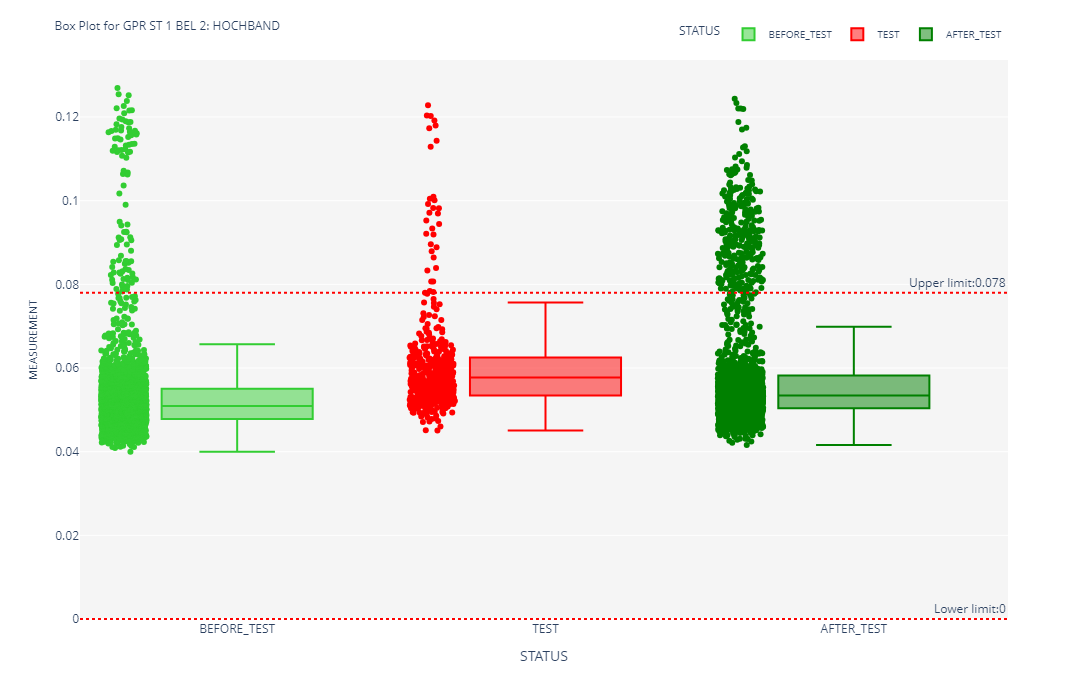

In [44]:
parameter_list=df_prg.PARAMETER.unique() #list parametrov
for param in parameter_list:
    UL=df_prg[df_prg['PARAMETER']==param]['UL'].iloc[0] #horná tolerancia
    LL=df_prg[df_prg['PARAMETER']==param]['LL'].iloc[0] #dolná tolerancia
    #param_data = df_prg[df_prg['Parameter_Machine_AP'] == param]
    fig = px.box(df_prg[df_prg['PARAMETER']==param], x="STATUS", y="MEASUREMENT",points="all", color="STATUS",
                 color_discrete_map={'BEFORE_TEST':"limegreen","TEST":"red","AFTER_TEST":"green"}, height=700, width=1000)
    fig.add_hline(y=UL, line_dash="dot", line_color="red", annotation_text=f'Upper limit:{UL}') #pridanie tolerancie do grafu
    fig.add_hline(y=LL, line_dash="dot", line_color="red", annotation_text=f'Lower limit:{LL}') #pridanie tolerancie do grafu
    fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1), legend_font_size=10) #nastavenie legendy
    fig.update_layout(title=f"Box Plot for {param}", title_font_size=12) #nastavenie nadpisu
    fig.update_layout(plot_bgcolor='whitesmoke') #nastavenie pozadia grafu
    fig.update_traces(marker=dict(size=5,line=dict(width=0.5,color='palegreen')),selector=dict(mode='markers')) #nastavenie bodov v grafe
    #fig.update_xaxes(title_text="TEST",title_font=dict(size=11))
    fig.update_yaxes(title_text="MEASUREMENT",title_font=dict(size=11))

    # Vypočítanie priemerov pre jednotlivé skupiny
    # production_ok_nvh = param_data[param_data['Status'] == 'NOK_NVH']['Value'].mean()
    # production_nok_nvh = param_data[param_data['Status'] == 'OK_NVH']['Value'].mean()

    # # Pridanie bodových grafov s priemernými hodnotami
    # fig.add_trace(go.Scatter(x=[param], y=[production_ok_nvh], mode='markers', marker=dict(color='blue'), name='Production OK_NVH'))
    # fig.add_trace(go.Scatter(x=[param], y=[production_nok_nvh], mode='markers', marker=dict(color='black'), name='Production NOK_NVH'))
    
    fig.show() #ukážka grafu